In [108]:
import pandas as pd
import yfinance as yf
import numpy as np
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [82]:
tickers_input = input("Enter stock tickers separated by commas (e.g.,AAPL, BA, T, MGM, AMZN, IBM, TSLA, GOOG): ")

Enter stock tickers separated by commas (e.g.,AAPL, BA, T, MGM, AMZN, IBM, TSLA, GOOG):  AAPL,BA,T,MGM, AMZN,IBM


In [83]:
tickers=[ticker.strip() for ticker in tickers_input.split(",")]

In [84]:
tickers

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM']

In [85]:
start_date = "2012-01-01"
end_date = "2024-05-01"

In [86]:
data=yf.download(tickers,start=start_date,end=end_date)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [87]:
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [88]:
data['sp500'] = sp500_data

In [89]:
data

Ticker            AAPL        AMZN          BA         IBM        MGM  \
Date                                                                    
2012-01-03   12.402624    8.951500   60.731110  109.844986  10.493512   
2012-01-04   12.469282    8.875500   60.821114  109.396820  10.427396   
2012-01-05   12.607713    8.880500   60.166508  108.877983  10.512403   
2012-01-06   12.739512    9.130500   60.534710  107.628036  10.512403   
2012-01-09   12.719307    8.928000   60.984768  107.067879  10.691859   
...                ...         ...         ...         ...        ...   
2024-04-24  168.595917  176.589996  164.330002  180.709900  42.709999   
2024-04-25  169.463730  173.669998  166.809998  165.799622  42.180000   
2024-04-26  168.875214  179.619995  167.220001  164.052399  41.090000   
2024-04-29  173.064667  180.960007  173.490005  164.346848  41.610001   
2024-04-30  169.902618  175.000000  167.839996  163.139511  39.439999   

Ticker              T        sp500  
Date                                
2012-01-03   9.002979  1277.060059  
2012-01-04   9.017798  1277.300049  
2012-01-05   9.008908  1281.060059  
2012-01-06   8.967381  1277.810059  
2012-01-09   8.961339  1280.699951  
...               ...          ...  
2024-04-24  16.561426  5071.629883  
2024-04-25  16.334827  5048.419922  
2024-04-26  16.502314  5099.959961  
2024-04-29  16.768322  5116.169922  
2024-04-30  16.640244  5035.689941  

[3101 rows x 7 columns]

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3101 entries, 2012-01-03 to 2024-04-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3101 non-null   float64
 1   AMZN    3101 non-null   float64
 2   BA      3101 non-null   float64
 3   IBM     3101 non-null   float64
 4   MGM     3101 non-null   float64
 5   T       3101 non-null   float64
 6   sp500   3101 non-null   float64
dtypes: float64(7)
memory usage: 193.8 KB


In [91]:
data.reset_index(inplace=True)

In [92]:
data.isna().sum()

Ticker
Date     0
AAPL     0
AMZN     0
BA       0
IBM      0
MGM      0
T        0
sp500    0
dtype: int64

In [93]:
data[data.columns[1:]]['AAPL']/data[data.columns[1:]]['AAPL'][0]

0        1.000000
1        1.005375
2        1.016536
3        1.027163
4        1.025534
          ...    
3096    13.593568
3097    13.663538
3098    13.616087
3099    13.953875
3100    13.698925
Name: AAPL, Length: 3101, dtype: float64

In [94]:
def normalize(df):
    x=df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [95]:
import plotly.express as px
def interative_plot(df,title):
    
    fig = px.line( title=title)
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'],y=df[i],name=i)


    fig.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



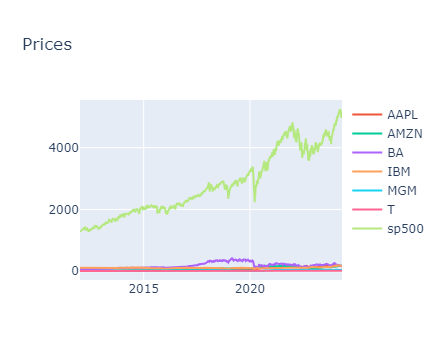

In [96]:
interative_plot(data,'Prices')

C:\Users\lenovo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



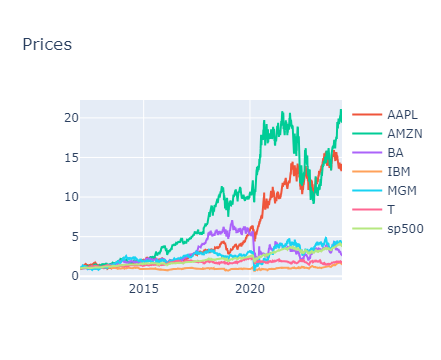

In [98]:
interative_plot(normalize(data),'Prices')

In [99]:
def daily_return(df):
    df_daily_return=df.copy()
    for i in  df.columns[1:]:
        for j in range(1,len(df)):
           df_daily_return[i][j]=((df[i][j]-df[i][j-1])/df[i][j-1])*100
        df_daily_return[i][0] = 0-
    return df_daily_return
    
    
        

In [100]:
stocks_daily_return = daily_return(data)
stocks_daily_return.head()

Ticker       Date      AAPL      AMZN        BA       IBM       MGM         T  \
0      2012-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      2012-01-04  0.537451 -0.849022  0.148201 -0.407998 -0.630069  0.164603   
2      2012-01-05  1.110173  0.056336 -1.076281 -0.474271  0.815225 -0.098585   
3      2012-01-06  1.045389  2.815157  0.611972 -1.148025  0.000000 -0.460953   
4      2012-01-09 -0.158605 -2.217835  0.743471 -0.520457  1.707095 -0.067383   

Ticker     sp500  
0       0.000000  
1       0.018792  
2       0.294372  
3      -0.253696  
4       0.226160

In [106]:
stocks_daily_return.iloc[:,1:].mean()

Ticker
AAPL     0.100361
AMZN     0.116665
BA       0.059596
IBM      0.022946
MGM      0.079429
T        0.028688
sp500    0.049866
dtype: float64

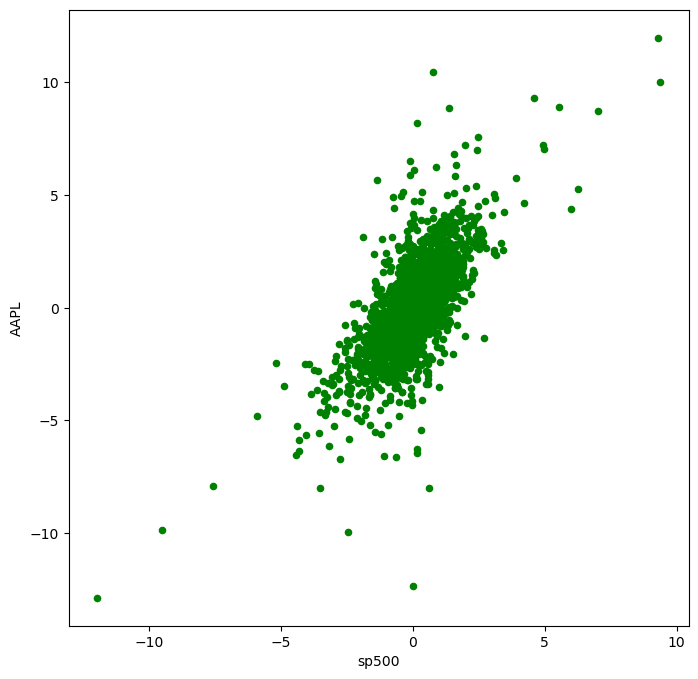

In [107]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8),color='green')
plt.show()

In [109]:
beta,alpha=np.polyfit(stocks_daily_return['sp500'],stocks_daily_return['AAPL'],1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', round(beta,3), round(alpha,3)))  

Beta for AAPL stock is = 1.169 and alpha is = 0.042


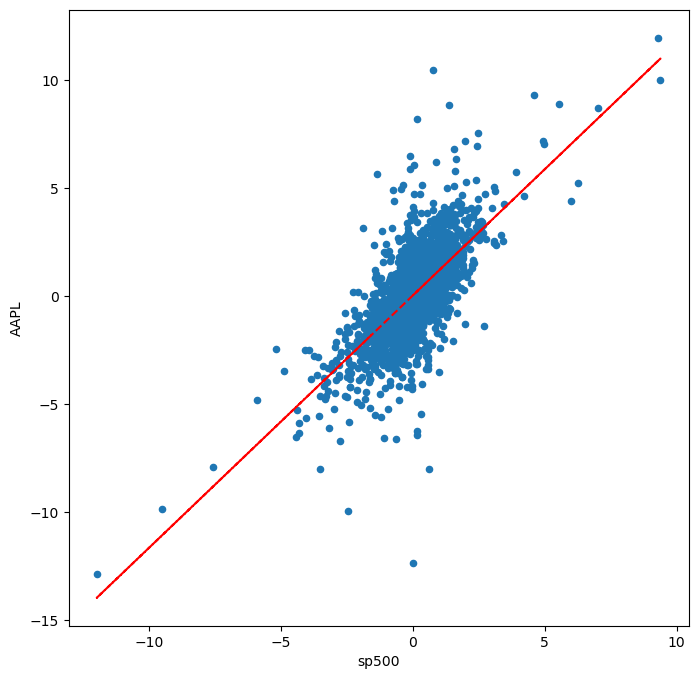

In [114]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8))
plt.plot(stocks_daily_return['sp500'],beta*stocks_daily_return['sp500']+alpha,'--',color='r')

In [115]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['IBM'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('IBM', round(beta,3), round(alpha,3)))  

Beta for IBM stock is = 0.838 and alpha is = -0.019


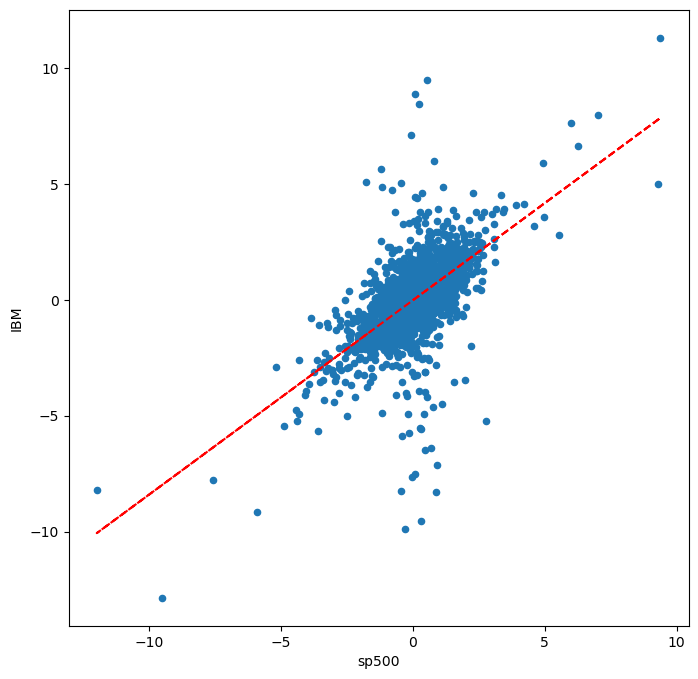

In [116]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'IBM',figsize=(8, 8))
plt.plot(stocks_daily_return['sp500'],beta*stocks_daily_return['sp500']+alpha,'--',color='r')

# APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [117]:
stocks_daily_return['sp500'].mean()

0.04986620148240628

In [118]:
rm = round(stocks_daily_return['sp500'].mean() * 252,3)

In [119]:
rm

12.566

In [125]:
# risk free rate is rf=3.841

ticker = '^TNX'
data = yf.download(ticker, start=start_date, end=end_date)['Adj Close'].mean()


[*********************100%%**********************]  1 of 1 completed


In [131]:
rf=data/100

In [132]:
rf

0.0232188677293639

# calculating retuen usinh cpam

In [136]:
er_apple=round((rf+(beta*(rm-rf))),3)

In [137]:
er_apple

10.536

In [138]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('T', round(beta,3), round(alpha,3)))

Beta for T stock is = 0.649 and alpha is = -0.004


In [139]:
ER_T = round(rf + ( beta * (rm - rf) ),3) 
print(ER_T)

8.162


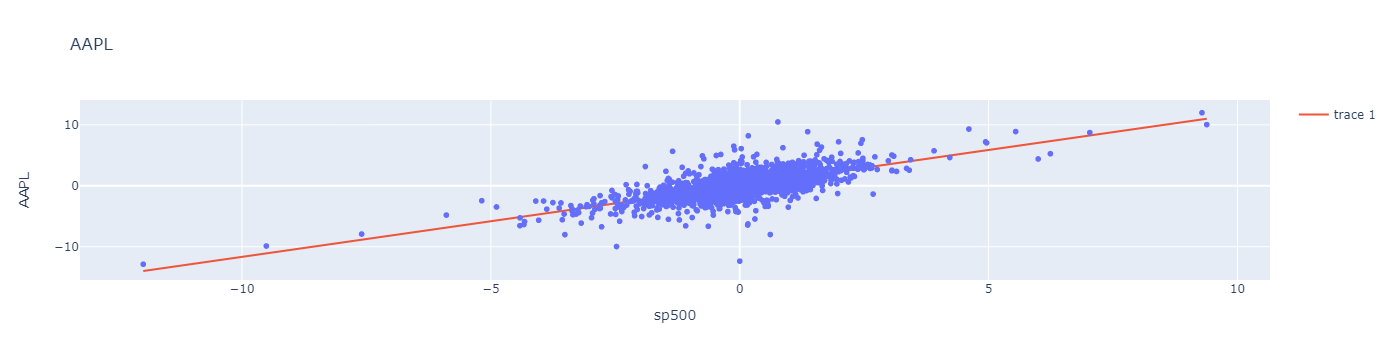

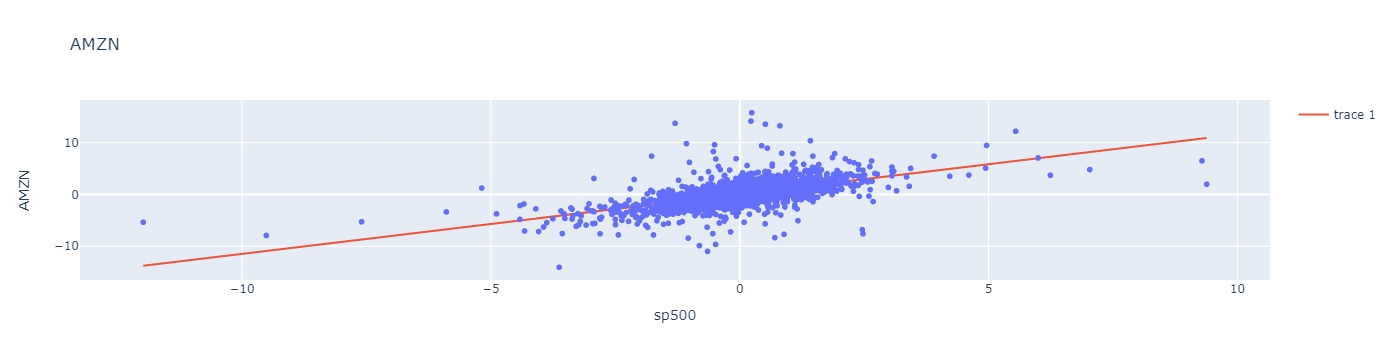

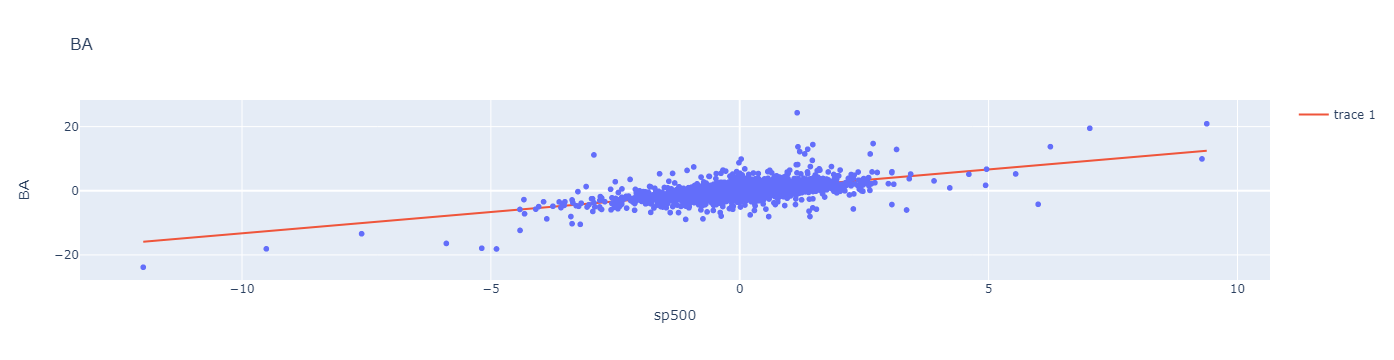

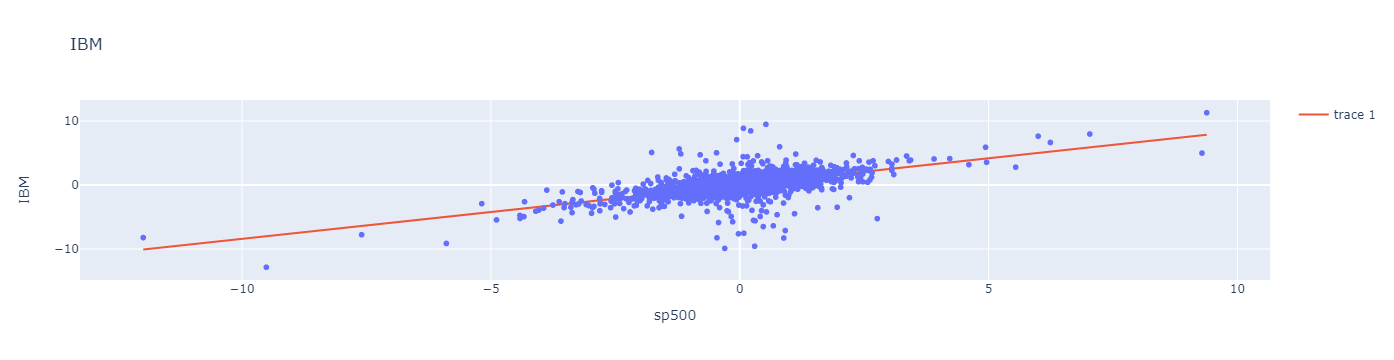

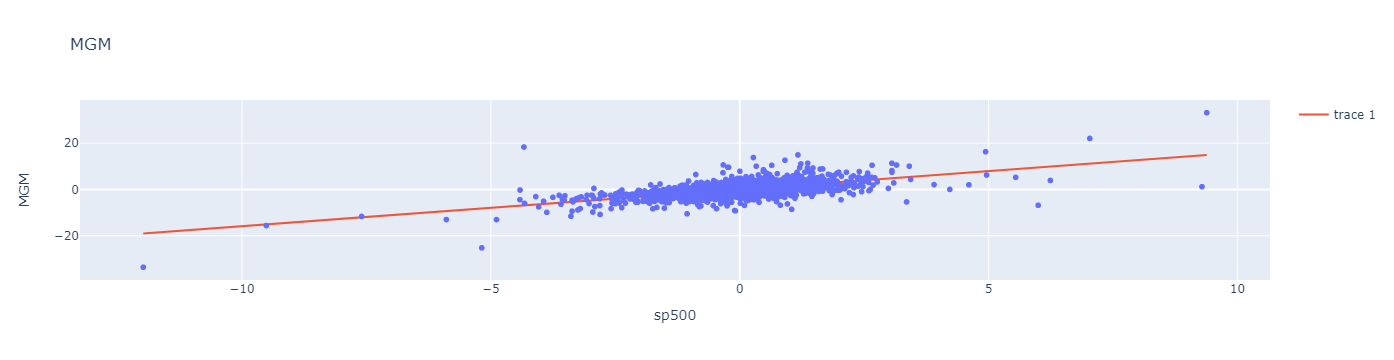

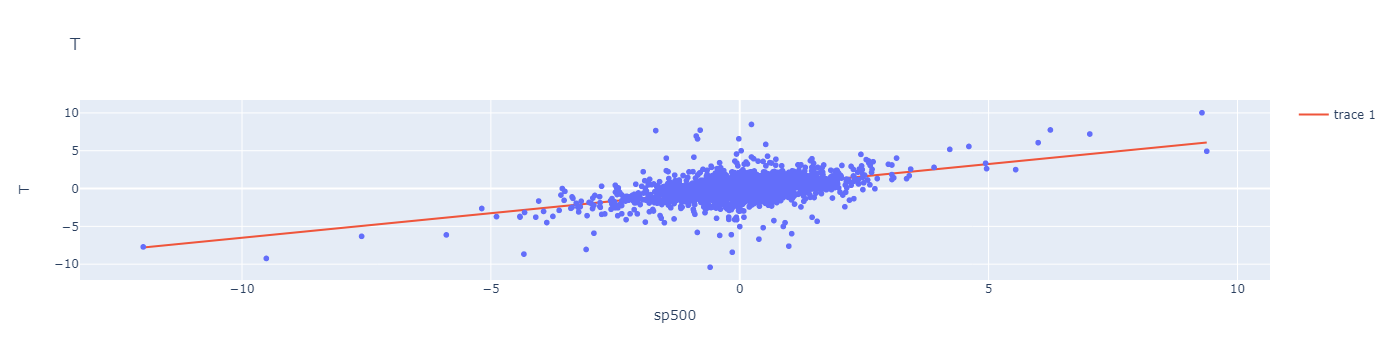

In [144]:
for i in stocks_daily_return.columns:
    if i !='Date' and i!='sp500':
        fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
        fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
        fig.show()
        

# CALCULATE BETA FOR ALL STOCKS

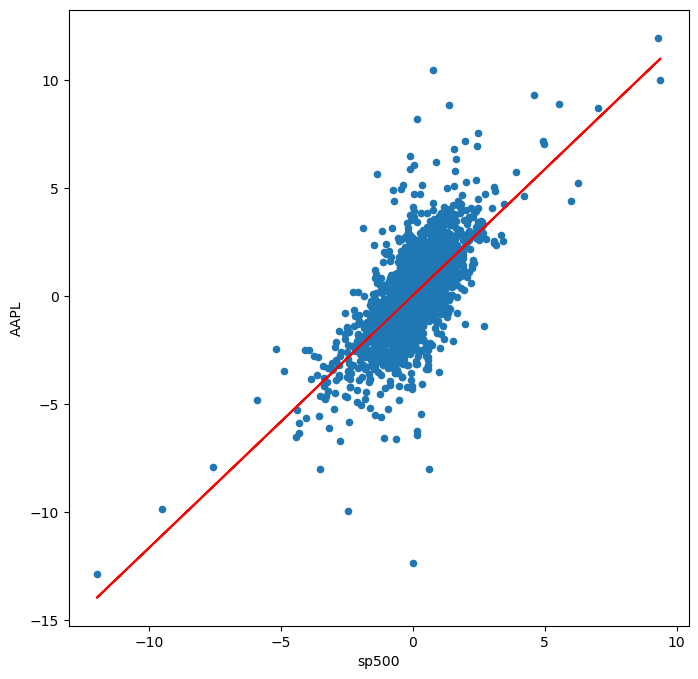

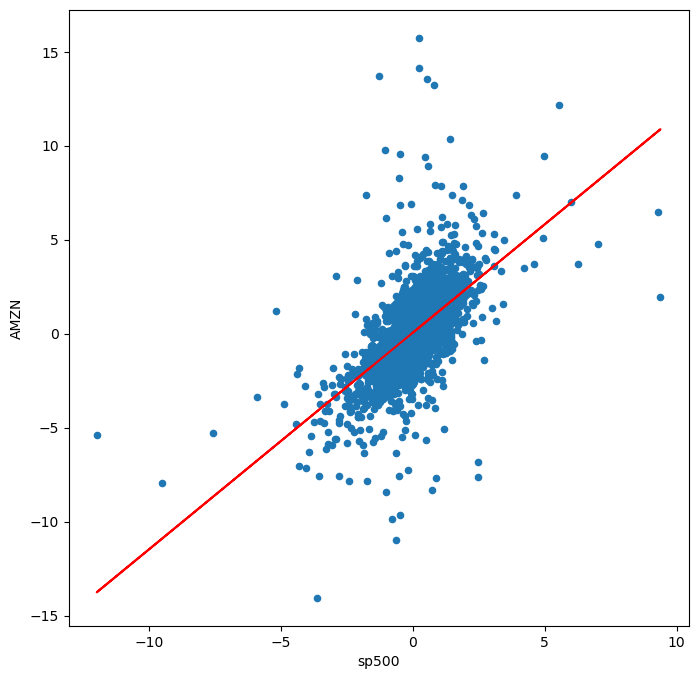

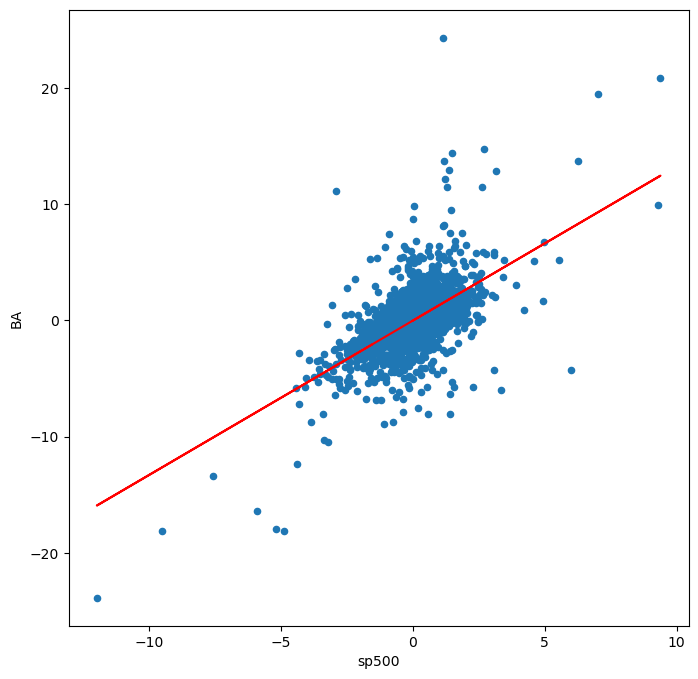

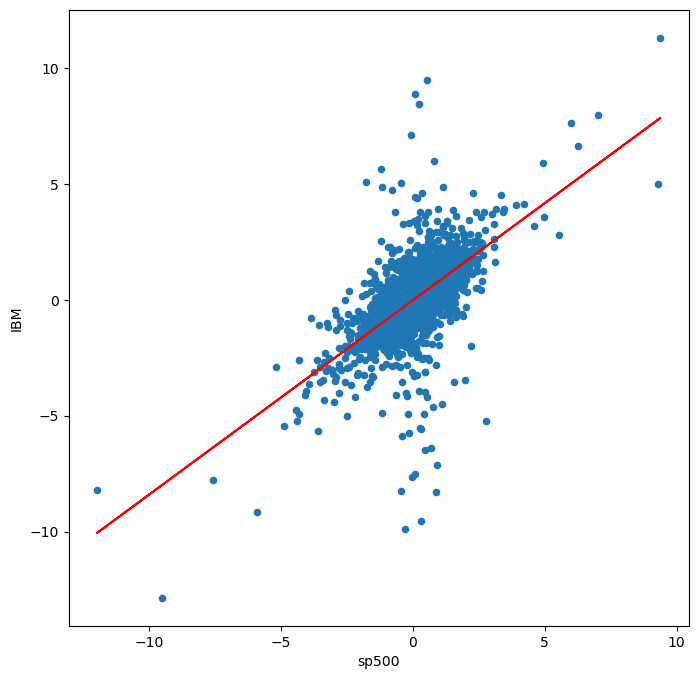

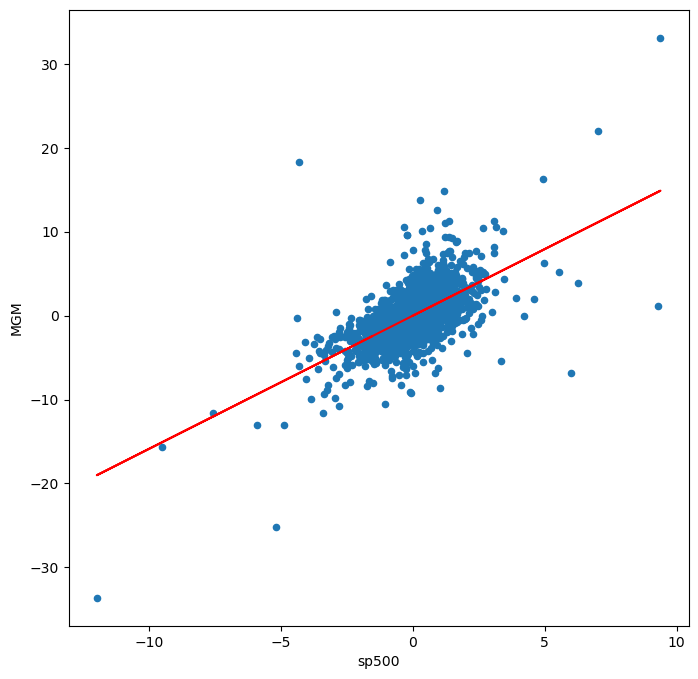

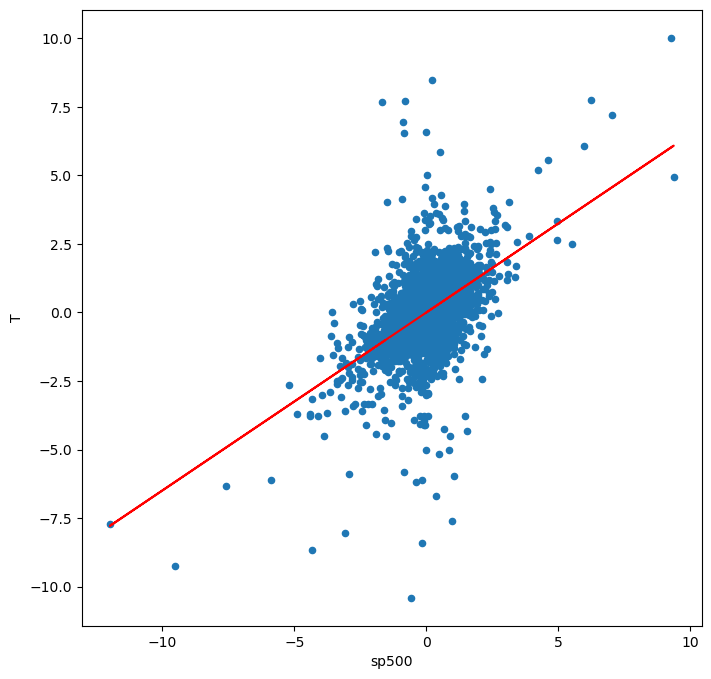

In [145]:
beta={}
alpha={}
for i in stocks_daily_return.columns:
    if i !='Date' and i !='sp500':
        stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i,figsize=(8, 8))
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
        plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
        beta[i]=b
        alpha[i]=a
        
        

In [148]:
keys=list(beta.keys())

In [149]:
keys

['AAPL', 'AMZN', 'BA', 'IBM', 'MGM', 'T']

ticker = '^TNX'
data = yf.download(ticker, start=start_date, end=end_date)['Adj Close'].mean()
rf=data/100


In [150]:
rf

0.0232188677293639

In [151]:
rm

12.566

In [152]:
ER={}
for i in keys:
    ER[i]=rf+(beta[i]*(rm-rf))

In [153]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, round(ER[i],3)))

Expected Return Based on CAPM for AAPL is 14.691%
Expected Return Based on CAPM for AMZN is 14.483%
Expected Return Based on CAPM for BA is 16.68%
Expected Return Based on CAPM for IBM is 10.536%
Expected Return Based on CAPM for MGM is 19.925%
Expected Return Based on CAPM for T is 8.162%


In [155]:
portfolio_weights = 1/len(keys) * np.ones(len(keys)) 

In [156]:
portfolio_weights

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [161]:
portfolio_weight_all=round(sum(list(ER.values())*portfolio_weights),3)

In [162]:
sum=0
for i in keys:
    sum=sum+ER[i] 
for i in keys:
  print('Contribution on CAPM for {} is {}'.format(i, round(ER[i]/sum,2)))

Contribution on CAPM for AAPL is 0.17
Contribution on CAPM for AMZN is 0.17
Contribution on CAPM for BA is 0.2
Contribution on CAPM for IBM is 0.12
Contribution on CAPM for MGM is 0.24
Contribution on CAPM for T is 0.1


In [202]:
Returns = pd.DataFrame(ER.values(),keys)
Returns.sort_values(by=0, ascending=False,inplace=True)


In [203]:
Returns

0
MGM   19.924930
BA    16.679830
AAPL  14.691375
AMZN  14.482686
IBM   10.535736
T      8.162163